# GEC Data Science Program
## Level 1, Lab 1

### Data download

In Lab sessions we use Titanic Data to demonstrate concepts:
https://www.kaggle.com/c/titanic

### Environment Setup

We will be using Anaconda with Python 3.7
https://www.anaconda.com/download/

### Hello world examples

In [1]:
import numpy as np

In [3]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
a=np.random.rand(10)

In [9]:
a

array([ 0.03261933,  0.47890447,  0.50438931,  0.17266064,  0.85893254,
        0.8381147 ,  0.47106125,  0.51054698,  0.59179618,  0.96607074])

In [10]:
a=np.random.rand(10,3)

In [11]:
a

array([[ 0.09803107,  0.21187583,  0.42518895],
       [ 0.11907278,  0.90428798,  0.60943409],
       [ 0.36562779,  0.84210899,  0.17423908],
       [ 0.27153629,  0.12278127,  0.36277867],
       [ 0.94873944,  0.95141057,  0.31091204],
       [ 0.70650879,  0.50451988,  0.24132679],
       [ 0.17350805,  0.3714808 ,  0.43534361],
       [ 0.18572595,  0.55539461,  0.79700438],
       [ 0.33492438,  0.12133685,  0.37833984],
       [ 0.53600039,  0.40554431,  0.95854449]])

In [12]:
a.shape

(10, 3)

In [13]:
len(a)

10

In [14]:
x=np.random.rand(20)
y=np.random.rand(20)

In [15]:
x

array([ 0.02897478,  0.45684216,  0.13828776,  0.80871649,  0.29433145,
        0.13026319,  0.18334284,  0.87677163,  0.00886281,  0.42628423,
        0.5076477 ,  0.86618334,  0.39911497,  0.25215598,  0.95289355,
        0.82172629,  0.47324224,  0.17926265,  0.32961195,  0.85355914])

In [16]:
y

array([ 0.88468781,  0.42681167,  0.16394872,  0.59144885,  0.72294528,
        0.24452357,  0.19187366,  0.5660967 ,  0.21875311,  0.47314971,
        0.19632078,  0.55263088,  0.30208822,  0.19437919,  0.21808031,
        0.20831291,  0.28902251,  0.18362011,  0.36713957,  0.24826232])

In [17]:
x*y

array([ 0.02563364,  0.19498557,  0.0226721 ,  0.47831443,  0.21278553,
        0.03185242,  0.03517866,  0.49633752,  0.00193877,  0.20169626,
        0.0996618 ,  0.47867966,  0.12056793,  0.04901387,  0.20780732,
        0.17117619,  0.13677766,  0.03291623,  0.12101359,  0.21190657])

In [18]:
x/y

array([ 0.03275142,  1.07036004,  0.84348181,  1.36734816,  0.40712826,
        0.53272242,  0.95553943,  1.54880188,  0.04051512,  0.90095   ,
        2.58580723,  1.56738136,  1.32118681,  1.29723755,  4.36946158,
        3.9446729 ,  1.63738887,  0.97626917,  0.89778377,  3.4381341 ])

In [19]:
x+y

array([ 0.91366259,  0.88365383,  0.30223647,  1.40016534,  1.01727673,
        0.37478676,  0.3752165 ,  1.44286833,  0.22761592,  0.89943394,
        0.70396849,  1.41881421,  0.70120319,  0.44653517,  1.17097386,
        1.0300392 ,  0.76226475,  0.36288277,  0.69675152,  1.10182145])

### Pandas review

#### Working with data frames

In [20]:
import pandas as pd

In [21]:
d=pd.DataFrame(data=np.random.rand(100,3),columns=['A','B','C'])

In [22]:
d.head()

,A,B,C
0,0.488353,0.574468,0.851891
1,0.029437,0.958598,0.081624
2,0.797733,0.970523,0.630404
3,0.982249,0.018517,0.255710
4,0.663172,0.071328,0.913296


In [23]:
d["A"]

0     0.488353
1     0.029437
2     0.797733
3     0.982249
4     0.663172
5     0.195160
6     0.658754
7     0.414325
8     0.752057
9     0.727980
10    0.625369
11    0.084228
12    0.601190
13    0.607569
14    0.470380
15    0.306796
16    0.147712
17    0.910034
18    0.218634
19    0.609376
20    0.738067
21    0.422749
22    0.686123
23    0.865533
24    0.327124
25    0.751045
26    0.859753
27    0.286244
28    0.411956
29    0.736387
        ...   
70    0.454691
71    0.661955
72    0.618566
73    0.458136
74    0.298127
75    0.996969
76    0.440156
77    0.461094
78    0.364444
79    0.228154
80    0.882048
81    0.008317
82    0.509959
83    0.764317
84    0.498374
85    0.277800
86    0.257974
87    0.206599
88    0.054189
89    0.942401
90    0.684165
91    0.995028
92    0.750787
93    0.859163
94    0.061594
95    0.742207
96    0.525829
97    0.514112
98    0.126394
99    0.727102
Name: A, Length: 100, dtype: float64

In [24]:
d.A

0     0.488353
1     0.029437
2     0.797733
3     0.982249
4     0.663172
5     0.195160
6     0.658754
7     0.414325
8     0.752057
9     0.727980
10    0.625369
11    0.084228
12    0.601190
13    0.607569
14    0.470380
15    0.306796
16    0.147712
17    0.910034
18    0.218634
19    0.609376
20    0.738067
21    0.422749
22    0.686123
23    0.865533
24    0.327124
25    0.751045
26    0.859753
27    0.286244
28    0.411956
29    0.736387
        ...   
70    0.454691
71    0.661955
72    0.618566
73    0.458136
74    0.298127
75    0.996969
76    0.440156
77    0.461094
78    0.364444
79    0.228154
80    0.882048
81    0.008317
82    0.509959
83    0.764317
84    0.498374
85    0.277800
86    0.257974
87    0.206599
88    0.054189
89    0.942401
90    0.684165
91    0.995028
92    0.750787
93    0.859163
94    0.061594
95    0.742207
96    0.525829
97    0.514112
98    0.126394
99    0.727102
Name: A, Length: 100, dtype: float64

In [25]:
d.shape

(100, 3)

### Loading data

In [26]:
d=pd.read_csv("train.csv")

In [28]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Q: how many passengers (data points or rows) do we have?

In [29]:
len(d)

891

In [30]:
d.shape

(891, 12)

#### General information about the dataset

In [31]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Two ways to reference a column:

In [34]:
#d["Age"] and d.Age
d.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

#### Q: What's the mean age of passengers?

In [37]:
d.Age.mean()

29.69911764705882

In [38]:
d.Age.max()

80.0

In [39]:
d.Age.min()

0.41999999999999998

#### Q: whats the mean price people paid?

In [40]:
d.Fare.mean()

32.2042079685746

#### Q: whats the max price people paid?

In [41]:
d.Fare.max()

512.32920000000001

#### Q: How many male/female passengers are there?

In [45]:
sum(d.Sex=='male')

577

In [46]:
sum(d.Sex=='female')

314

In [47]:
d.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### Q: find all values of Embarked and their counts?

In [49]:
d.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### How many passengers are in each class?

In [50]:
d.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Quick summary of all numerical variables

In [51]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Q: How many (unique) Passenger Classes 'Pclass' are there?

In [53]:
d.Pclass.unique()

array([3, 1, 2], dtype=int64)

#### Q: How many (unique) Passenger Names are there?

In [57]:
len(d.Name.unique())

891

#### Q: Are the any duplicates?

In [61]:
d1=d.drop_duplicates()

In [62]:
len(d1),len(d)

(891, 891)

#### Q: How many passengers survived?

In [63]:
d.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [67]:
sum(d.Survived==1)

342

#### Q: How many females between 20 and 30?

In [73]:
sum((d.Sex=='female') & (20<d.Age) & (d.Age<30))

70

In [80]:
idx=((d.Sex=='female') & (20<d.Age) & (d.Age<30))

In [85]:
d_F2030 = d[idx]

In [86]:
d_F2030.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S


In [87]:
len(d_F2030)

70

In [91]:
# x=123
# this is y 
# y=456

#### Q: How many male passengers survived?

In [92]:
sum((d.Sex=='male') & (d.Survived==1))
#109

109

#### Q: How many female passengers survived?

In [93]:
sum((d.Sex=='female') & (d.Survived==1))
#233

233

#### Q: What percentage of male passengers survived?

In [97]:
# (number_of_survived males / total_number of males) * 100
sum((d.Sex=='male') & (d.Survived==1)) / sum(d.Sex=='male') *100
# 19%, 

18.890814558058924

#### Q: What percentage of female passengers survived?

In [98]:
sum((d.Sex=='female') & (d.Survived==1)) / sum(d.Sex=='female') *100
# 74%

74.203821656050948

#### Q: How much was the highest ticket price? and who paid it?

In [101]:
max_price = d.Fare.max()

In [102]:
max_price

512.32920000000001

In [105]:
sum(d.Fare == max_price)

3

In [107]:
d[d.Fare == max_price]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


#### Q: How is the oldest person?

In [108]:
d[d.Age==d.Age.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


#### Q: how many under age of 10? how many of them died?

In [110]:
sum(d.Age < 10)

62

In [111]:
sum((d.Age < 10) & (d.Survived==0))

24

In [112]:
24/62*100

38.70967741935484

#### Q: how many first-class passengers died?

In [113]:
sum((d.Pclass == 1) & (d.Survived==0))

80

#### Q: what percentage of each class survived?

In [114]:
d.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [116]:
sum((d.Pclass == 1) & (d.Survived==1)) /216
#63

0.62962962962962965

In [115]:
sum((d.Pclass == 2) & (d.Survived==1)) /184
#47

0.47282608695652173

In [117]:
sum((d.Pclass == 3) & (d.Survived==1)) /491
#24

0.24236252545824846

#### Q: what's the chance of survival for female, first-class passengers??

In [122]:
# number of females in 1st class who died / total number of females in 1st class
sum((d.Sex=='female') & (d.Pclass == 1) & (d.Survived==1)) / sum((d.Sex=='female') & (d.Pclass == 1)) * 100

96.808510638297875

#### Q: what's the chance of survival for male, first-class passengers??

In [124]:
sum((d.Sex=='male') & (d.Pclass == 1) & (d.Survived==1)) / sum((d.Sex=='male') & (d.Pclass == 1)) * 100

36.885245901639344

### Visualizations

In [127]:
import numpy as np
from matplotlib import pyplot as plt

In [128]:
%matplotlib inline 
#notebook

In [129]:
a=np.random.randn(1000)

In [130]:
b=np.random.randn(1000)

[0, 100, -5, 5]

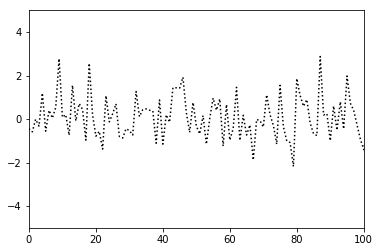

In [150]:
# plt.figure(figsize=(15,7))
plt.plot(a,':k')
plt.axis([0, 100, -5, 5])

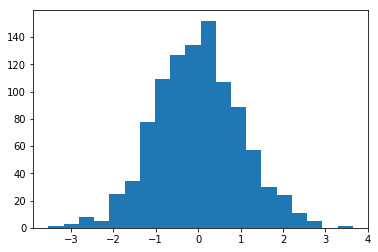

In [149]:
plt.hist(a, bins=20);

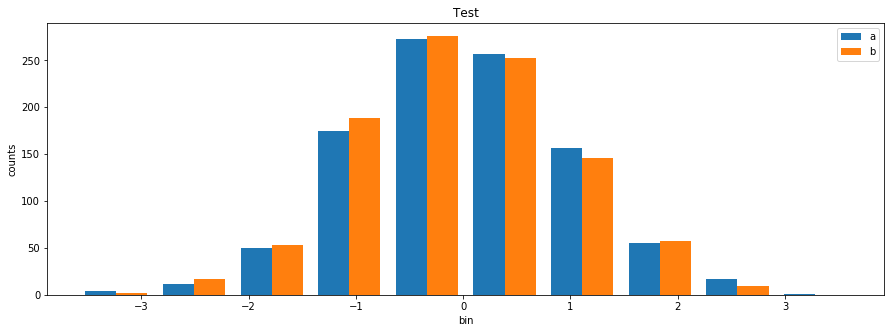

In [157]:
plt.figure(figsize=(15,5))
plt.hist([a,b]);
plt.legend(["a","b"]);
plt.xlabel("bin");
plt.ylabel("counts")
plt.title("Test");

### Exploring data

#### Histrogram of Age

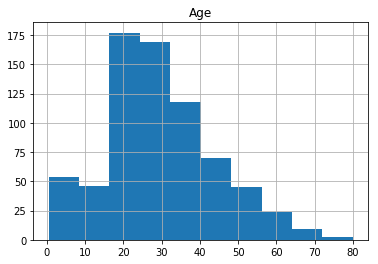

In [158]:
d.hist("Age");

In [169]:
# d.fillna(0)

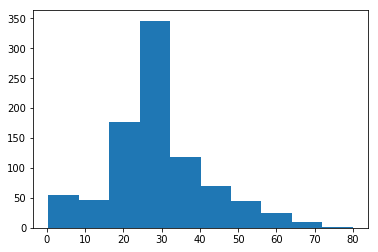

In [170]:
# plt.hist(d["Age"]);
plt.hist(d['Age'].fillna(d.Age.mean()));

#### Q: What is the distribution of Age in 'survided' vs 'not survived' groups?

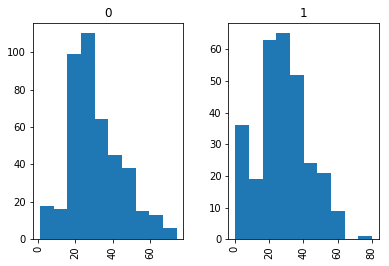

In [171]:
d.hist(column='Age',by='Survived');

In [178]:
# d.hist(column='Age',by='Sex');

In [179]:
# d.hist(column='Age',by='Pclass',figsize=(10,10));

#### Q: Can we put the two distributions (above) in the same graph?

In [180]:
idx_died = d.Survived == 0
idx_survived = d.Survived == 1
age = d.Age.fillna(d.Age.mean())

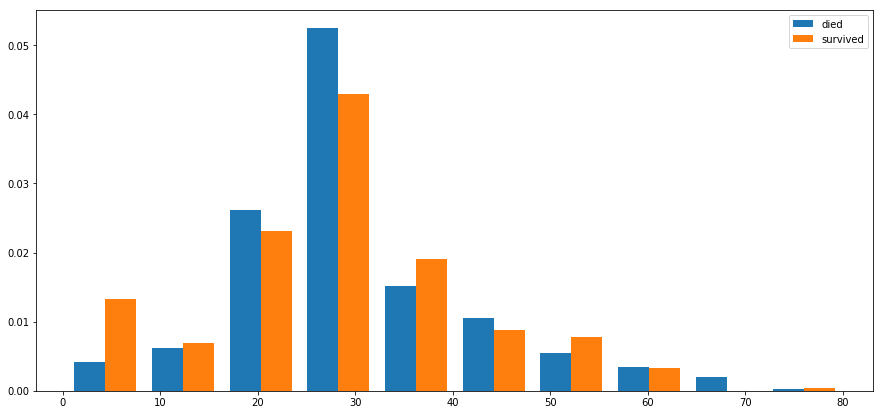

In [187]:
plt.figure(figsize=(15,7))
plt.hist([age[idx_died], age[idx_survived]], normed=True);
plt.legend(['died','survived']);

In [184]:
# plt.hist(d.Age.fillna(0));

#### Q: What is the distribution (histogram) of "Embarked"?

In [190]:
d.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

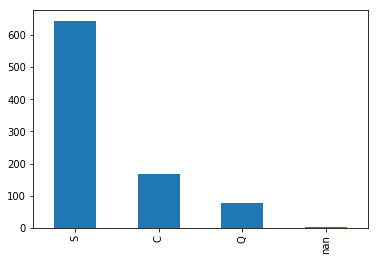

In [188]:
d.Embarked.value_counts(dropna=False).plot.bar();

### Joining Tables

#### Let's say our data was given in two datasets:

In [191]:
d=pd.read_csv("train.csv")
d1=d[["PassengerId","Name"]]
d2=d[["PassengerId","Age"]][d["Age"].notnull()].sort_values("Age").reset_index(drop=True)

In [192]:
d1.head()

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"


In [193]:
len(d1)

891

In [194]:
d2.head()

,PassengerId,Age
0,804,0.42
1,756,0.67
2,645,0.75
3,470,0.75
4,79,0.83


In [195]:
len(d2)

714

In [196]:
#merge is similar to SQL join
d3=d1.merge(d2,on="PassengerId")

In [197]:
d3

,PassengerId,Name,Age
0,1,"Braund, Mr. Owen Harris",22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,3,"Heikkinen, Miss. Laina",26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,5,"Allen, Mr. William Henry",35.0
5,7,"McCarthy, Mr. Timothy J",54.0
6,8,"Palsson, Master. Gosta Leonard",2.0
7,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
8,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
9,11,"Sandstrom, Miss. Marguerite Rut",4.0


### *Q: How many different passenger 'titles' (Mr. Miss. Dr. etc) are there? What is the distribution?

In [199]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
name="Braund, Mr. Owen Harris"

In [220]:
name.split(',')[1].split('.')[0]

' Mr'

In [208]:
a="this is artificial intelligence class"

In [209]:
a

'this is artificial intelligence class'

In [216]:
a.split('i')

['th', 's ', 's art', 'f', 'c', 'al ', 'ntell', 'gence class']

In [218]:
a.split('i')[5]

'al '

In [222]:
d['title']=d.Name.map(lambda name: name.split(',')[1].split('.')[0])

In [224]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [225]:
title_counts = d.title.value_counts()

In [226]:
title_counts

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Capt              1
 Sir               1
 Ms                1
 Jonkheer          1
 Mme               1
 the Countess      1
 Don               1
 Lady              1
Name: title, dtype: int64

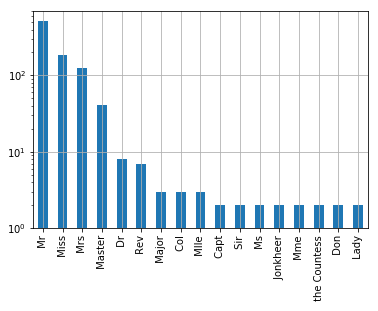

In [227]:
title_counts.plot.bar(log=True, grid='on');

### *Q: What's chance of survival for each title?

In [ ]:
d1=d[['title','Survived']].copy()

In [ ]:
d1['count']=1

In [ ]:
d2=d1.groupby(...).sum()

In [ ]:
d2.head()

In [ ]:
d2['survival_chance']=d2[...]/d2[...]

In [ ]:
d2.sort_values(by='survival_chance', ascending=False)